# Model creation

Basic segmentation architecture:

<img src='./seg_archi.JPG' width='90%'/>

* "Encoder" part: 
    * Input : image size x 3 channels
    * Convolutions & Max-Pooling
    * Increase number of features (=channels), decrease size
* "Decoder" part:
    * Convolutions & Upscaling
    * Decrease number of features, increase size
    * End: image size x 2 classes ("background" / "foreground")

In [1]:
import tensorflow as tf

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0     

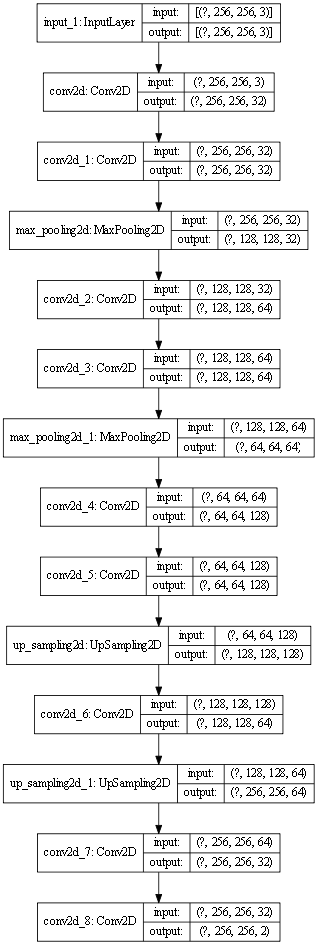

In [11]:
tf.keras.backend.clear_session()
image_size = (256,256)
inputs = tf.keras.Input(shape=image_size+(3,))
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(inputs)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(x)
outputs = tf.keras.layers.Conv2D(2, 1, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.losses.SparseCategoricalCrossentropy(name='crossentropy'), 'accuracy']
)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='base_model.png', dpi=60)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0     

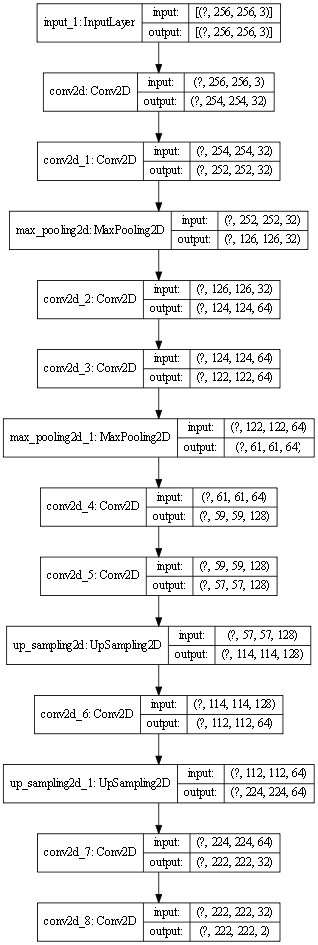

In [12]:
tf.keras.backend.clear_session()
image_size = (256,256)
inputs = tf.keras.Input(shape=image_size+(3,))
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='valid')(inputs)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='valid')(x)
outputs = tf.keras.layers.Conv2D(2, 1, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.losses.SparseCategoricalCrossentropy(name='crossentropy'), 'accuracy']
)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='base_model_valid.png', dpi=60)

## Adding short-skip connections

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

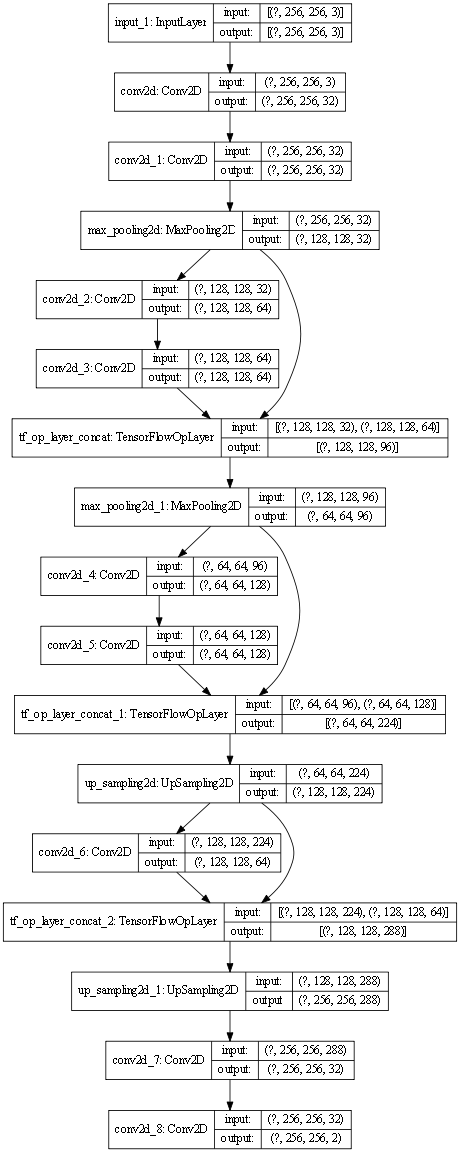

In [21]:
tf.keras.backend.clear_session()
image_size = (256,256)
inputs = tf.keras.Input(shape=image_size+(3,))
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(inputs)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x_ = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x_)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.concat([x_, x], axis=3)
x_ = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='same')(x_)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.concat([x_, x], axis=3)
x_ = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x_)
x = tf.concat([x_, x], axis=3)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(x)
outputs = tf.keras.layers.Conv2D(2, 1, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.losses.SparseCategoricalCrossentropy(name='crossentropy'), 'accuracy']
)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='shortskip_model.png', dpi=60)

## Adding long-skip connections

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

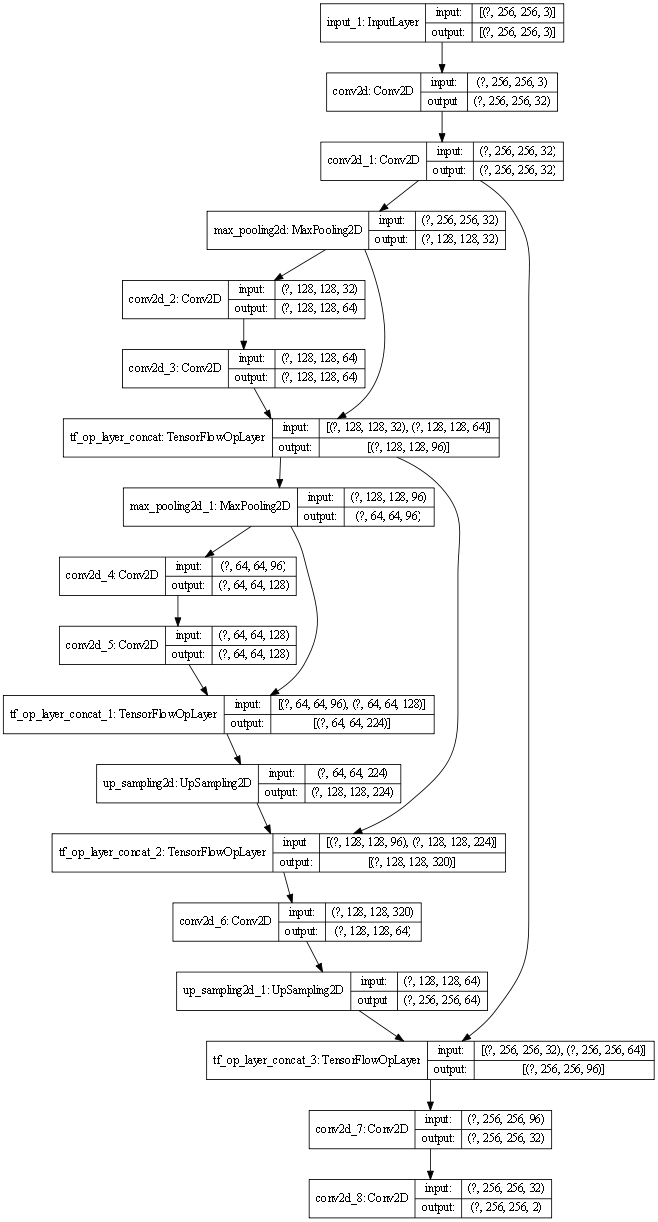

In [22]:
tf.keras.backend.clear_session()
image_size = (256,256)
inputs = tf.keras.Input(shape=image_size+(3,))
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(inputs)
A = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x_ = tf.keras.layers.MaxPool2D(2)(A)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x_)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x)
B = tf.concat([x_, x], axis=3)
x_ = tf.keras.layers.MaxPool2D(2)(B)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='same')(x_)
x = tf.keras.layers.Conv2D(128, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.concat([x_, x], axis=3)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.concat([B, x], axis=3)
x = tf.keras.layers.Conv2D(64, 3, activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.concat([A, x], axis=3)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.leaky_relu, padding='same')(x)
outputs = tf.keras.layers.Conv2D(2, 1, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.losses.SparseCategoricalCrossentropy(name='crossentropy'), 'accuracy']
)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, to_file='longskip_model.png', dpi=60)